

# AIML ML Classification

# Part one: classifiers

In [10]:
import pandas as pd
import random
from statistics import mean
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import matplotlib.cbook as cbook
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [11]:
# loading the three dataset
data_steel = pd.read_csv('php9xWOpn.csv') # steel-plates-fult
data_ionosphere = pd.read_csv('dataset_59_ionosphere.csv') # ionosphere
data_banknotes = pd.read_csv('php50jXam.csv') # banknotes
def data_process(dataset):
    X = dataset.iloc[:, 0:(len(dataset.columns)-1)]
    X = pd.DataFrame(StandardScaler().fit_transform(X))
    y = dataset.iloc[:, -1]
    data=(X,y)
    return data
data_steel=data_process(data_steel)
data_ionosphere=data_process(data_ionosphere)
data_banknotes=data_process(data_banknotes)

In [14]:
# making a fake data.
random.seed(18)
X, y = make_classification(n_features=3, n_redundant=0, n_informative=2, n_clusters_per_class=1)
X += 4.0 * np.random.uniform(size=X.shape)
# X = StandardScaler().fit_transform(X)
data_fake = (X,y)

In [16]:
data_fake


(array([[ 3.04241647,  1.50664396,  1.83034618],
        [-0.51746744,  0.94170162,  2.75630185],
        [-1.39541301,  1.21256836,  4.27582317],
        [ 3.47535564,  4.73832719,  3.53341752],
        [ 5.52976719,  4.13347839,  4.23704866],
        [ 5.73007967,  1.93356485, -0.33729308],
        [ 0.25972629,  2.62036589,  1.64344023],
        [-0.70817683, -0.96504067,  4.05888081],
        [ 2.27432444,  4.21979599,  2.14560199],
        [ 0.28400261,  5.06281205,  2.47726821],
        [-0.23481018,  3.9677589 ,  1.12795158],
        [ 6.68035584,  3.87282351,  2.19785858],
        [ 1.71204281,  3.80987726,  2.04636833],
        [-1.26021246,  3.69620017,  3.13020922],
        [ 4.37299253,  2.5149192 ,  0.77223995],
        [ 1.64443251, -0.31093732,  1.53597546],
        [ 2.42404195,  5.23245161,  2.39644246],
        [ 4.55139374,  4.23541783,  1.77690185],
        [ 3.86759614,  1.83606309,  3.82734763],
        [ 0.34724103,  2.00751166,  1.9433212 ],
        [ 0.61660703

In [ ]:
accs = pd.DataFrame(columns=range(7), index=range(4))
Best_acc = pd.DataFrame(columns=range(4), index=range(7))
Best_cv = pd.DataFrame(columns=range(4), index=range(7))

In [193]:
# make sub-boxlot of classification
def clf_subboxplot(clf_title, acc_data, contr_value):
    acc1, acc2, acc3, acc4 = acc_data
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True)
    stats1 = cbook.boxplot_stats(acc1, labels=contr_value, bootstrap=10000)
    stats2 = cbook.boxplot_stats(acc2, labels=contr_value, bootstrap=10000)
    stats3 = cbook.boxplot_stats(acc3, labels=contr_value, bootstrap=10000)
    stats4 = cbook.boxplot_stats(acc4, labels=contr_value, bootstrap=10000)
    fs = 10 
    axs[0, 0].bxp(stats1)
    axs[0, 0].set_title('Steel data', fontsize=fs)

    axs[0, 1].bxp(stats2)
    axs[0, 1].set_title('Ionosphere data', fontsize=fs)

    axs[1, 0].bxp(stats3)
    axs[1, 0].set_title('Banknotes data', fontsize=fs)

    axs[1, 1].bxp(stats4)
    axs[1, 1].set_title('Fake data', fontsize=fs)
    
    fig.suptitle(clf_title,fontsize=18)
    fig.subplots_adjust(hspace=0.2)
    plt.show()
    return

#### Produce the plots

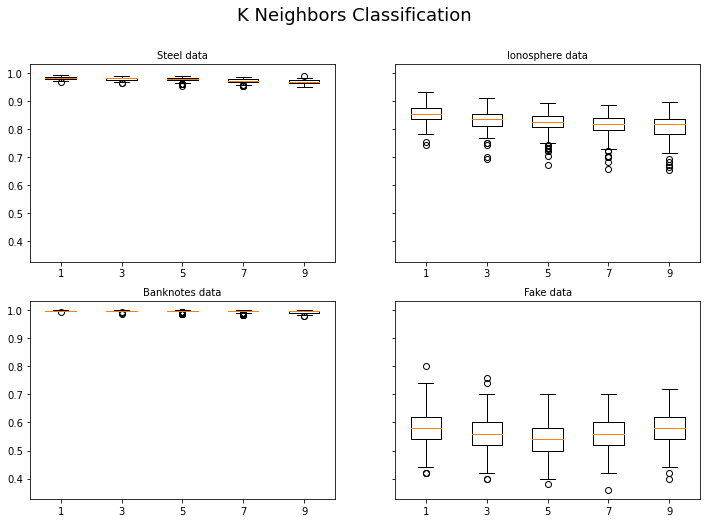

The Steel data best accuracy value:  0.9814541709577755 , K =  1
The Ionosphere data best accuracy value:  0.8530454545454546 , K =  1
The Banknotes data best accuracy value:  0.9981749271137026 , K =  3
The Fake data best accuracy value:  0.5836 , K =  1


In [194]:
#1 Knn classification 
def knn_classify(dataset):
    accs, k, acc_avg = [], [], []
    for i in range(5):
        r = 0
        acc=[]
        for r in range(250):
            X, y = dataset
            train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.5, random_state=r)
            cls_knn = KNeighborsClassifier(n_neighbors = 2*i+1)
            cls_knn.fit(train_X, train_y)
            #knn_acc = cls_knn.score(test_X, test_y, sample_weight=None)
            ypred = cls_knn.predict(test_X)
            knn_acc = accuracy_score(y_true=test_y, y_pred=ypred)
            acc.append(knn_acc)
            r += 1            
        accs.append(acc)
        acc_avg.append(mean(acc))
        k.append(2*i+1)
    best_knn_acc=max(acc_avg)
    best_k = k[acc_avg.index(best_knn_acc)]
    return accs, k, best_knn_acc, best_k

# KNN classifing
accs.at[0,0], k, Best_acc.at[0,0], Best_cv.at[0,0] = knn_classify(data_steel)
accs.at[0,1], k, Best_acc.at[0,1], Best_cv.at[0,1] = knn_classify(data_ionosphere)
accs.at[0,2], k, Best_acc.at[0,2], Best_cv.at[0,2] = knn_classify(data_banknotes)
accs.at[0,3], k, Best_acc.at[0,3], Best_cv.at[0,3] = knn_classify(data_fake)

# K Neighbors Classifier subboxplot
clf_title='K Neighbors Classification'
acc_data = (accs.at[0,0],accs.at[0,1],accs.at[0,2],accs.at[0,3])
contr_value = k
clf_subboxplot(clf_title, acc_data, contr_value)
print("The Steel data best accuracy value: ", Best_acc.at[0,0] , ", K = ", Best_cv.at[0,0])
print("The Ionosphere data best accuracy value: ", Best_acc.at[0,1], ", K = ", Best_cv.at[0,1])
print("The Banknotes data best accuracy value: ", Best_acc.at[0,2], ", K = ", Best_cv.at[0,2])
print("The Fake data best accuracy value: ", Best_acc.at[0,3], ", K = ", Best_cv.at[0,3])

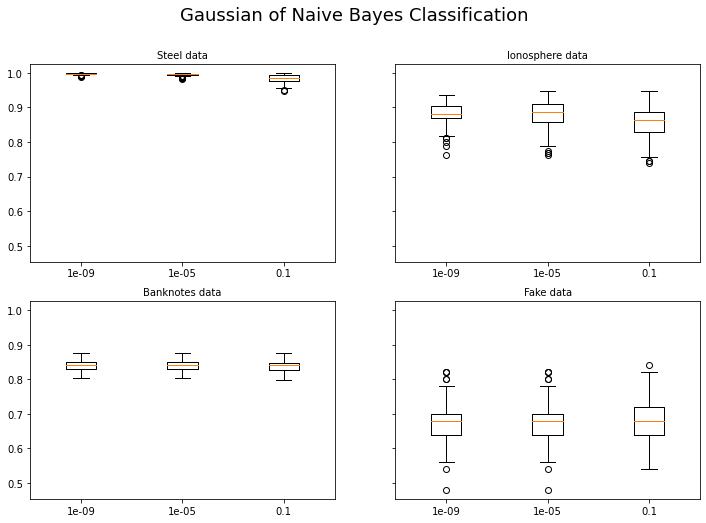

The Steel data best accuracy value:  0.9975406797116375 , var_smoothing =  1e-09
The Ionosphere data best accuracy value:  0.8826590909090909 , var_smoothing =  1e-09
The Banknotes data best accuracy value:  0.8406530612244898 , var_smoothing =  1e-05
The Fake data best accuracy value:  0.67496 , var_smoothing =  0.1


In [195]:
#2 GNB the Gaussian form of Naive Bayes
def gnb_classify(dataset):
    vss = [1e-9,1e-5,1e-1]
    accs, acc_avg = [], []
    for vs in vss:
        r = 0
        acc = []
        for r in range(250):
            X, y = dataset
            trainX, testX, trainy, testy = train_test_split(X, y,test_size=0.5, random_state=r)
            gnb = GaussianNB(var_smoothing=vs)
            gnb.fit(trainX, trainy)
            gnb_acc = gnb.score(testX, testy, sample_weight=None)
            acc.append(gnb_acc)
        accs.append(acc)
        acc_avg.append(mean(acc))
    best_gnb_acc=max(acc_avg)
    best_vs = vss[acc_avg.index(best_gnb_acc)]
    return accs, vss, best_gnb_acc, best_vs

# GNB classifing 
accs.at[1,0], vs, Best_acc.at[1,0], Best_cv.at[1,0] = gnb_classify(data_steel)
accs.at[1,1], vs, Best_acc.at[1,1], Best_cv.at[1,1] = gnb_classify(data_ionosphere)
accs.at[1,2], vs, Best_acc.at[1,2], Best_cv.at[1,2] = gnb_classify(data_banknotes)
accs.at[1,3], vs, Best_acc.at[1,3], Best_cv.at[1,3] = gnb_classify(data_fake)

# Gaussian of Naive Bayes Classifier subboxplot
clf_title='Gaussian of Naive Bayes Classification'
acc_data = (accs.at[1,0],accs.at[1,1],accs.at[1,2],accs.at[1,3])
contr_value = vs
clf_subboxplot(clf_title, acc_data, contr_value)
print("The Steel data best accuracy value: ", Best_acc.at[1,0] , ", var_smoothing = ", Best_cv.at[1,0])
print("The Ionosphere data best accuracy value: ", Best_acc.at[1,1], ", var_smoothing = ", Best_cv.at[1,1])
print("The Banknotes data best accuracy value: ", Best_acc.at[1,2], ", var_smoothing = ", Best_cv.at[1,2])
print("The Fake data best accuracy value: ", Best_acc.at[1,3], ", var_smoothing = ", Best_cv.at[1,3])

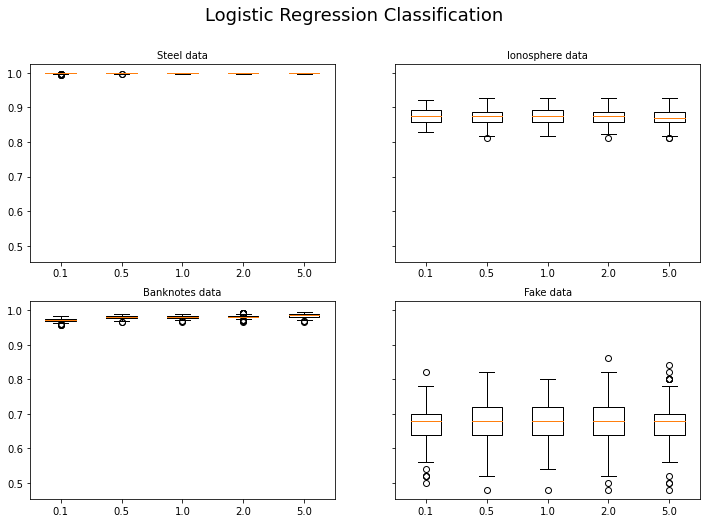

The Steel data best accuracy value:  0.9996786817713698 , C =  5.0
The Ionosphere data best accuracy value:  0.8742045454545454 , C =  0.1
The Banknotes data best accuracy value:  0.9842857142857143 , C =  5.0
The Fake data best accuracy value:  0.674 , C =  0.5


In [196]:
#3 LRC LogisticRegression (essentially, a perceptron)
def lrc_classify(dataset):
    cs = [.1, .5, 1.0, 2.0, 5.0]
    accs, acc_avg = [], []
    for c in cs:
        r = 0
        acc = []
        for r in range(250):
            X, y = dataset
            train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.5, random_state=r)
            lrc = LogisticRegression(random_state=0,C = c)
            lrc.fit(train_X, train_y)
            lrc_acc = lrc.score(test_X, test_y, sample_weight=None)
            acc.append(lrc_acc)
            r += 1
        accs.append(acc)
        acc_avg.append(mean(acc))
    best_lrc_acc=max(acc_avg)
    best_c = cs[acc_avg.index(best_lrc_acc)]
    return accs, cs, best_lrc_acc, best_c

# LRC classifing 
accs.at[2,0], cs, Best_acc.at[2,0], Best_cv.at[2,0] = lrc_classify(data_steel)
accs.at[2,1], cs, Best_acc.at[2,1], Best_cv.at[2,1] = lrc_classify(data_ionosphere)
accs.at[2,2], cs, Best_acc.at[2,2], Best_cv.at[2,2] = lrc_classify(data_banknotes)
accs.at[2,3], cs, Best_acc.at[2,3], Best_cv.at[2,3] = lrc_classify(data_fake)

# Logistic Regression Classifier subboxplot
clf_title='Logistic Regression Classification'
acc_data = (accs.at[2,0],accs.at[2,1],accs.at[2,2],accs.at[2,3])
contr_value = cs
clf_subboxplot(clf_title, acc_data, contr_value)
print("The Steel data best accuracy value: ", Best_acc.at[2,0] , ", C = ", Best_cv.at[2,0])
print("The Ionosphere data best accuracy value: ", Best_acc.at[2,1], ", C = ", Best_cv.at[2,1])
print("The Banknotes data best accuracy value: ", Best_acc.at[2,2], ", C = ", Best_cv.at[2,2])
print("The Fake data best accuracy value: ", Best_acc.at[2,3], ", C = ", Best_cv.at[2,3])

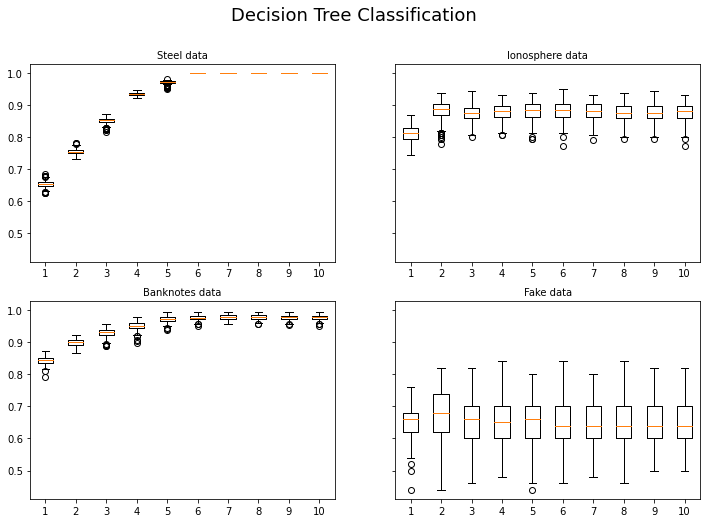

The Steel data best accuracy value:  1.0 , max_depth =  6
The Ionosphere data best accuracy value:  0.8814318181818181 , max_depth =  2
The Banknotes data best accuracy value:  0.9781166180758017 , max_depth =  7
The Fake data best accuracy value:  0.67408 , max_depth =  2


In [197]:
#4 DTC DecisionTreeClassifier (a decision tree (DT))
def dtc_classify(dataset):
    accs, deep, acc_avg = [], [], []
    for i in range(10):
        r = 0
        acc = []
        for r in range(250):
            X, y = dataset
            train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.5, random_state=r)
            dtc = DecisionTreeClassifier(max_depth = i + 1)
            dtc.fit(train_X, train_y)
            dtc_acc = dtc.score(test_X, test_y, sample_weight=None)
            acc.append(dtc_acc)
            r += 1
        accs.append(acc)
        acc_avg.append(mean(acc))
        deep.append(i+1)
    best_acc=max(acc_avg)
    best_deep = deep[acc_avg.index(best_acc)]
    return accs, deep, best_acc, best_deep

# dtc classifing 
accs.at[3,0], deep, Best_acc.at[3,0], Best_cv.at[3,0] = dtc_classify(data_steel)
accs.at[3,1], deep, Best_acc.at[3,1], Best_cv.at[3,1] = dtc_classify(data_ionosphere)
accs.at[3,2], deep, Best_acc.at[3,2], Best_cv.at[3,2] = dtc_classify(data_banknotes)
accs.at[3,3], deep, Best_acc.at[3,3], Best_cv.at[3,3] = dtc_classify(data_fake)

# DecisionTree Classifier subboxplot
clf_title='Decision Tree Classification'
acc_data = (accs.at[3,0],accs.at[3,1],accs.at[3,2],accs.at[3,3])
contr_value = deep
clf_subboxplot(clf_title, acc_data, contr_value)
print("The Steel data best accuracy value: ", Best_acc.at[3,0] , ", max_depth = ", Best_cv.at[3,0])
print("The Ionosphere data best accuracy value: ", Best_acc.at[3,1], ", max_depth = ", Best_cv.at[3,1])
print("The Banknotes data best accuracy value: ", Best_acc.at[3,2], ", max_depth = ", Best_cv.at[3,2])
print("The Fake data best accuracy value: ", Best_acc.at[3,3], ", max_depth = ", Best_cv.at[3,3])

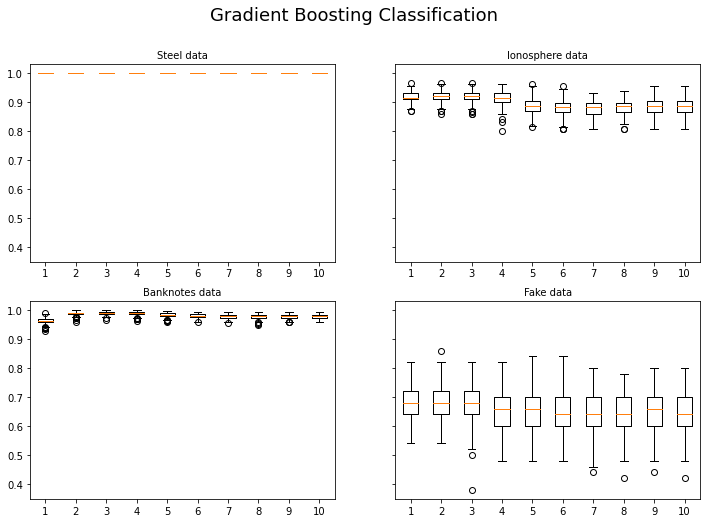

The Steel data best accuracy value:  1.0 , max_depth =  1
The Ionosphere data best accuracy value:  0.9205 , max_depth =  2
The Banknotes data best accuracy value:  0.9899591836734694 , max_depth =  3
The Fake data best accuracy value:  0.68432 , max_depth =  2


In [198]:
#5 GBC GradientBoostingClassifier (Gradient Boosted DTs)
def gbc_classify(dataset):
    accs, deep, acc_avg = [], [], []
    for i in range(10):
        r = 0
        acc = []
        for r in range(250):
            X, y = dataset
            train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.5, random_state=r)
            gbc = GradientBoostingClassifier(max_depth = i + 1)
            gbc.fit(train_X, train_y)
            gbc_acc = gbc.score(test_X, test_y, sample_weight=None)
            acc.append(gbc_acc)
            r += 1
        accs.append(acc)
        acc_avg.append(mean(acc))
        deep.append(i+1)
    best_acc=max(acc_avg)
    best_deep = deep[acc_avg.index(best_acc)]
    return accs, deep, best_acc, best_deep

# GBC classifing 
accs.at[4,0], deep, Best_acc.at[4,0], Best_cv.at[4,0] = gbc_classify(data_steel)
accs.at[4,1], deep, Best_acc.at[4,1], Best_cv.at[4,1] = gbc_classify(data_ionosphere)
accs.at[4,2], deep, Best_acc.at[4,2], Best_cv.at[4,2] = gbc_classify(data_banknotes)
accs.at[4,3], deep, Best_acc.at[4,3], Best_cv.at[4,3] = gbc_classify(data_fake)

# GradientBoosting Classifier subboxplot
clf_title='Gradient Boosting Classification'
acc_data = (accs.at[4,0],accs.at[4,1],accs.at[4,2],accs.at[4,3])
contr_value = deep
clf_subboxplot(clf_title, acc_data, contr_value)
print("The Steel data best accuracy value: ", Best_acc.at[4,0] , ", max_depth = ", Best_cv.at[4,0])
print("The Ionosphere data best accuracy value: ", Best_acc.at[4,1], ", max_depth = ", Best_cv.at[4,1])
print("The Banknotes data best accuracy value: ", Best_acc.at[4,2], ", max_depth = ", Best_cv.at[4,2])
print("The Fake data best accuracy value: ", Best_acc.at[4,3], ", max_depth = ", Best_cv.at[4,3])

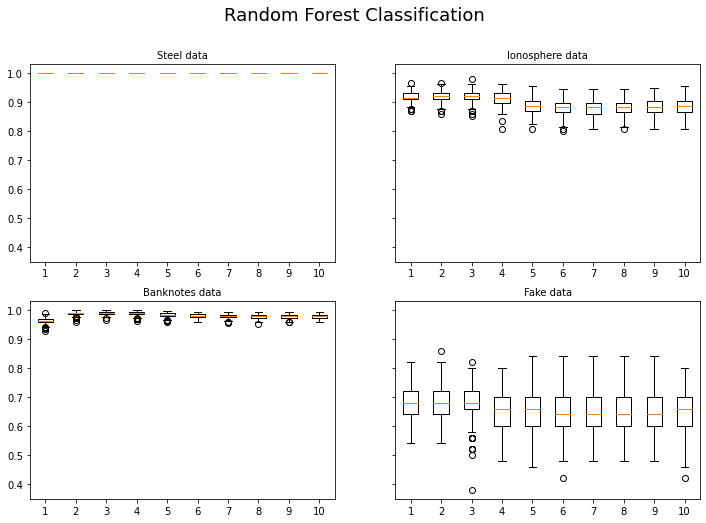

The Steel data best accuracy value:  1.0 , max_depth =  1
The Ionosphere data best accuracy value:  0.9206818181818182 , max_depth =  2
The Banknotes data best accuracy value:  0.9899825072886297 , max_depth =  3
The Fake data best accuracy value:  0.68488 , max_depth =  2


In [199]:
#6 RFC RandomForestClassifier (random forest, ensemble of DTs)
def rfc_classify(dataset):
    accs, deep, acc_avg = [], [], []
    for i in range(10):
        r = 0
        acc = []
        for r in range(250):
            X, y = dataset
            train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.5, random_state=r)
            rfc = RandomForestClassifier(max_depth = i + 1)
            rfc.fit(train_X, train_y)
            rfc_acc = rfc.score(test_X, test_y, sample_weight=None)
            acc.append(rfc_acc)
            r += 1
        accs.append(acc)
        deep.append(i + 1)
        acc_avg.append(mean(acc))
    best_acc=max(acc_avg)
    best_deep = deep[acc_avg.index(best_acc)]
    return accs, deep, best_acc, best_deep

# RFC RandomForest classifing 
accs.at[5,0], deep, Best_acc.at[5,0], Best_cv.at[5,0] = rfc_classify(data_steel)
accs.at[5,1], deep, Best_acc.at[5,1], Best_cv.at[5,1] = rfc_classify(data_ionosphere)
accs.at[5,2], deep, Best_acc.at[5,2], Best_cv.at[5,2] = rfc_classify(data_banknotes)
accs.at[5,3], deep, Best_acc.at[5,3], Best_cv.at[5,3] = rfc_classify(data_fake)

# RandomForest Classifier subboxplot
clf_title='Random Forest Classification'
acc_data = (accs.at[5,0],accs.at[5,1],accs.at[5,2],accs.at[5,3])
contr_value = deep
clf_subboxplot(clf_title, acc_data, contr_value)
print("The Steel data best accuracy value: ", Best_acc.at[5,0] , ", max_depth = ", Best_cv.at[5,0])
print("The Ionosphere data best accuracy value: ", Best_acc.at[5,1], ", max_depth = ", Best_cv.at[5,1])
print("The Banknotes data best accuracy value: ", Best_acc.at[5,2], ", max_depth = ", Best_cv.at[5,2])
print("The Fake data best accuracy value: ", Best_acc.at[5,3], ", max_depth = ", Best_cv.at[5,3])

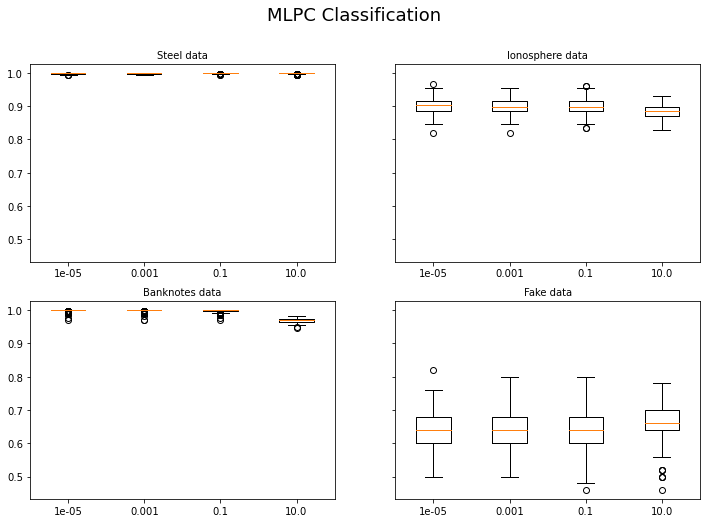

The Steel data best accuracy value:  0.9989207003089599 , alpha =  10.0
The Ionosphere data best accuracy value:  0.90225 , alpha =  1e-05
The Banknotes data best accuracy value:  0.998798833819242 , alpha =  1e-05
The Fake data best accuracy value:  0.66376 , alpha =  10.0


In [200]:
#7 MLPC MLPClassifier (neural net)
def mlp_classify(dataset):
    alphas = [1e-5, 1e-3,0.1, 10.0]
    accs, acc_avg = [], []
    for a in alphas:
        r = 0
        acc = []
        for r in range(250):
            X, y = dataset
            train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.5, random_state=r)
            mlp = MLPClassifier(alpha = a)
            mlp.fit(train_X, train_y)
            mlp_acc = mlp.score(test_X, test_y, sample_weight=None)
            acc.append(mlp_acc)
            r += 1
        accs.append(acc)
        acc_avg.append(mean(acc))
    best_acc=max(acc_avg)
    best_a = alphas[acc_avg.index(best_acc)]
    return accs, alphas, best_acc, best_a

# MLPClassifier (neural net) classifing 
accs.at[6,0], alpha, Best_acc.at[6,0], Best_cv.at[6,0] = mlp_classify(data_steel)
accs.at[6,1], alpha, Best_acc.at[6,1], Best_cv.at[6,1] = mlp_classify(data_ionosphere)
accs.at[6,2], alpha, Best_acc.at[6,2], Best_cv.at[6,2] = mlp_classify(data_banknotes)
accs.at[6,3], alpha, Best_acc.at[6,3], Best_cv.at[6,3] = mlp_classify(data_fake)

# MLPC (neural net) Classifier subboxplot
clf_title='MLPC Classification'
acc_data = (accs.at[6,0],accs.at[6,1],accs.at[6,2],accs.at[6,3])
contr_value = alpha
clf_subboxplot(clf_title, acc_data, contr_value)
print("The Steel data best accuracy value: ", Best_acc.at[6,0] , ", alpha = ", Best_cv.at[6,0])
print("The Ionosphere data best accuracy value: ", Best_acc.at[6,1], ", alpha = ", Best_cv.at[6,1])
print("The Banknotes data best accuracy value: ", Best_acc.at[6,2], ", alpha = ", Best_cv.at[6,2])
print("The Fake data best accuracy value: ", Best_acc.at[6,3], ", alpha = ", Best_cv.at[6,3])

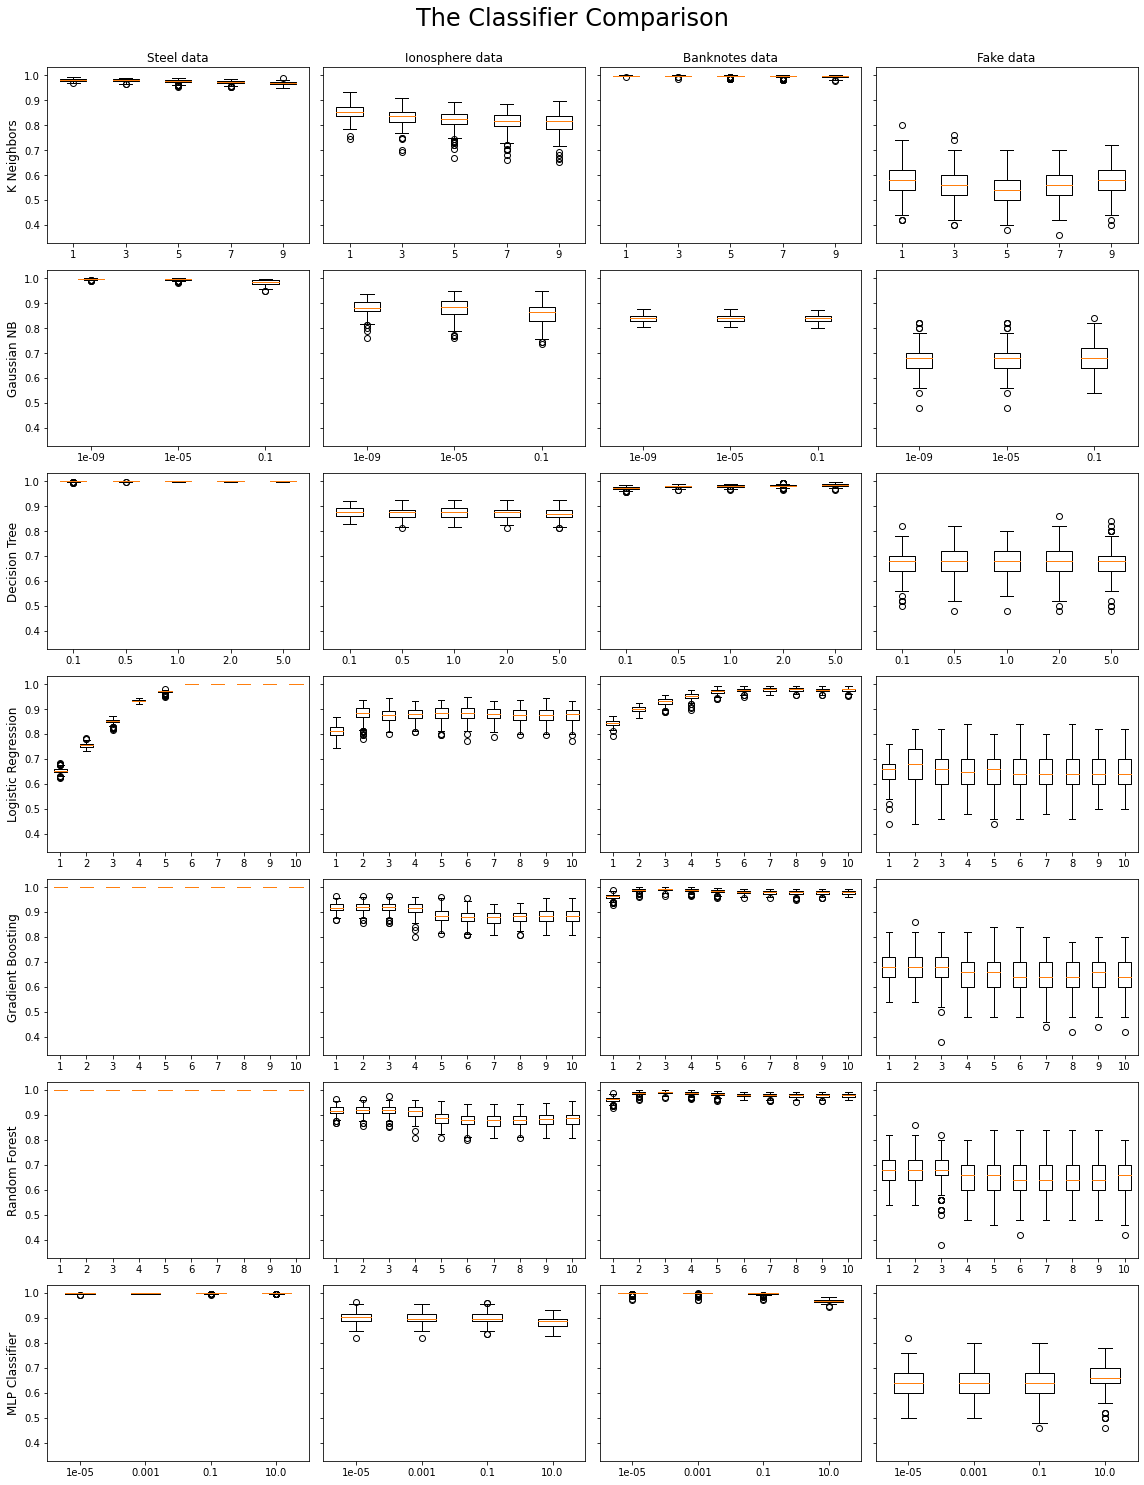

In [201]:
# plot the whole classification
labs = [k,vs,cs,deep,deep,deep,alpha]
xlabs = ['Steel data','Ionosphere data','Banknotes data','Fake data']
ylabs = ['K Neighbors','Gaussian NB','Decision Tree','Logistic Regression','Gradient Boosting','Random Forest','MLP Classifier']
fig, axs = plt.subplots(nrows=7, ncols=4,figsize=(16, 21), constrained_layout=True, sharey=True)
fig.suptitle('The Classifier Comparison',fontsize=24)
i, j = 0, 0
for i in range(7):
    axs[i,0].set_ylabel(ylabs[i], fontsize=12)
    for j in range(4):        
        axs[0, j].set_title(xlabs[j], fontsize=12)
        axs[i, j].bxp(cbook.boxplot_stats(accs.at[i,j], labels=labs[i], bootstrap=10000)) #
        j += 1
    i += 1
fig.subplots_adjust(hspace=0.2)
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()

#### Additional commentary

In [202]:
# Table 1:  The best average accuracy value
Accuracy=Best_acc
Accuracy.columns = ['Steel data','Ionosphere data','Banknotes data','Fake data']
Accuracy.index = ['Knn','Gnb','LR','DT','GB','RF','MLP']
print("Table 1:  The best average accuracy value")
Accuracy

Table 1:  The best average accuracy value


,Steel data,Ionosphere data,Banknotes data,Fake data
Knn,0.981454,0.853045,0.998175,0.5836
Gnb,0.997541,0.882659,0.840653,0.67496
LR,0.999679,0.874205,0.984286,0.674
DT,1,0.881432,0.978117,0.67408
GB,1,0.9205,0.989959,0.68432
RF,1,0.920682,0.989983,0.68488
MLP,0.998921,0.90225,0.998799,0.66376


In [203]:
# Table 2:  The best control parameter
Parameties=Best_cv
Parameties.columns = ['Steel data','Ionosphere data','Banknotes data','Fake data']
Parameties.index = ['Knn: n_neighbors','Gnb: var_smoothing','LR: C','DT: max_depth','GB: max_depth','RF: max_depth','MLP: alpha']
print("Table 2:  The best control parameter")
Parameties

Table 2:  The best control parameter


,Steel data,Ionosphere data,Banknotes data,Fake data
Knn: n_neighbors,1,1,3,1
Gnb: var_smoothing,1e-09,1e-09,1e-05,0.1
LR: C,5,0.1,5,0.5
DT: max_depth,6,2,7,2
GB: max_depth,1,2,3,2
RF: max_depth,1,2,3,2
MLP: alpha,10,1e-05,1e-05,10


### Classifier summary

The plots show that results are  variant by different algorithm and associated parameters when implemented for the four datasets. From the classify model point of view, DT (Decision Tree),LR (Logistic Regression), GB (Gradient Boosting), and RF (Random Forest) classification have the highest performance on all the datasets, particularly the steel data accuracy achieved to 100%. Furthermore, all the algorithms classified the dataset steel, ionosphere and banknotes that the accuracies are equally above 85%. The fake data average accuracies indicated between 60% to 70% approximately. Comparatively, KNN has the lowest classify performance and GB, RF and MLP shows the highest results of classification accuracy. In addition, the classification accuracy is also effected by algorithm parameters as well. Mostly the control value of parameters play slightly role in the classification model for those four datasets. There are no big differences on their performance, exclude the Decision Tree classification implemented on data steel and ionosphere. The changed of max depth of DT has a large amount of improvement results when the steel data and banknotes data applied Decision Tree Classifier. The accuracy of steel data from 0.65 jump to 1.0 dramatically when the max depth of DT from 1 increased to 6. Similarly,  the Banknotes data got the higher result after DT’s max depth is 6. Each data has their own suitable value of parameter with each models. However, the fake data shows no much different from variety parameters of algorithms. In conclusion, there are more need to study about the classification model with data. Some thing need to be mentioned, the K value of KNN normally using odd value as it need vote the nearest neighbors. So I changed to [1, 3, 5, 7, 9]  as the controller values of KNN in this experiment. All of the dataset, X part have done the StandardScaler().fit_transform(X) which mean all the data have the Standardize features . Actually, it makes the classification performance much higher than only using original data features. 




## Part two: clustering, for semi-supervised learning

In [3]:
# semi-supervised learning
def semi_sup_learn(dataset, k):
    dataX = dataset.iloc[:, 0:(len(dataset.columns)-1)]
    datay = dataset.iloc[:, -1]
    kmeansb1 = KMeans(n_clusters=k, random_state=0).fit(dataX)
    dataXX = dataX.assign(X = kmeansb1.labels_)
    i = 0
    acc3,acc4=[],[]
    for i in range(100):
        trainX1, testX1, trainy1, testy1 = train_test_split(dataX, datay,test_size=0.95, random_state=i)
        gnb3 = GaussianNB().fit(trainX1, trainy1)
        gnb_acc3 = gnb3.score(testX1, testy1, sample_weight=None)
        acc3.append(gnb_acc3)
    
        trainX2, testX2, trainy2, testy2 = train_test_split(dataXX, datay,test_size=0.95, random_state=i)
        gnb4 = GaussianNB().fit(trainX2, trainy2)
        gnb_acc4 = gnb4.score(testX2, testy2, sample_weight=None)
        acc4.append(gnb_acc4)
    return(acc3, acc4)

Text(0.5, 1.0, 'Iris data semi-supervised learning')

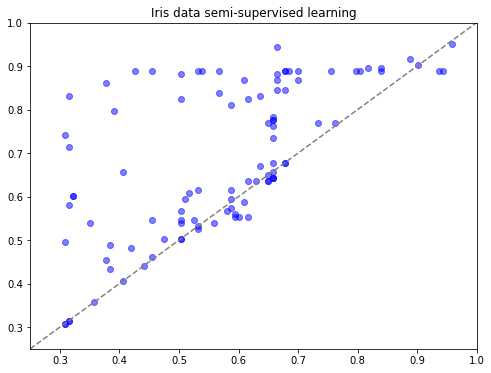

In [4]:
# loading the iris dataset and semi supervised learning
# plot iris data the scatterplot of result
datairis = pd.read_csv('dataset_iris.csv') # dataset_iris.csv
x1 , y1 = semi_sup_learn(datairis, 3)
f, ax = plt.subplots(figsize=(8, 6))
ax.plot([0.25, 1], [0.25, 1], ls="--", c=".5")
ax.set(xlim=(0.25, 1), ylim=(0.25, 1))
ax.scatter(x1, y1, c='blue', alpha=0.5)
ax.set_title('Iris data semi-supervised learning')

Text(0.5, 1.0, 'Banknotes data semi-supervised learning')

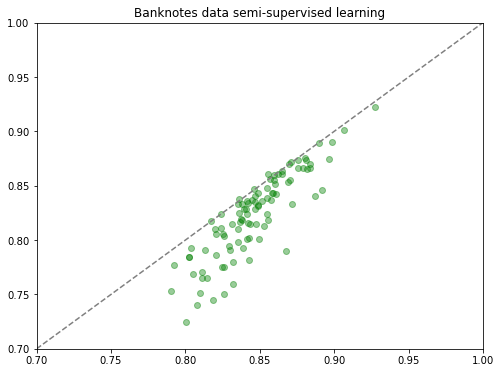

In [5]:
# Banknotes data clustering for semi-supervised learning
dataset1 = pd.read_csv('php50jXam.csv') # banknotes
x, y = semi_sup_learn(dataset1, 2)
f, ax = plt.subplots(figsize=(8, 6))
ax.plot( [0.7, 1], [0.7, 1], ls="--", c=".5")
ax.set(xlim=(0.7, 1), ylim=(0.7, 1))
ax.scatter(x, y, c='green', alpha=0.4)
ax.set_title('Banknotes data semi-supervised learning')

### Part two report
As we can see above, the plot scatter of the scores without the cluster and with the cluster, Iris data and Bank notes show very different results. The classification accuracy for iris data have increased, by contrast, the bank notes accuracy have reduced. So why the data Iris by Kmeans Semi Supervisor the Classification result have improved, and Banknotes  didn’t. However, after I tried different K values kmeans regression for Banknotes data (plot scatters show blown), K =3, the result keep same, the big improvement show after K is 4 and higher. The data by the kmeans regression can not make a clearly boundary for two classes (k=2) in data Banknotes. It make more confused for classification.  When k >= 4, the kmeans regression make more cluster which potentially helped the classification model. 

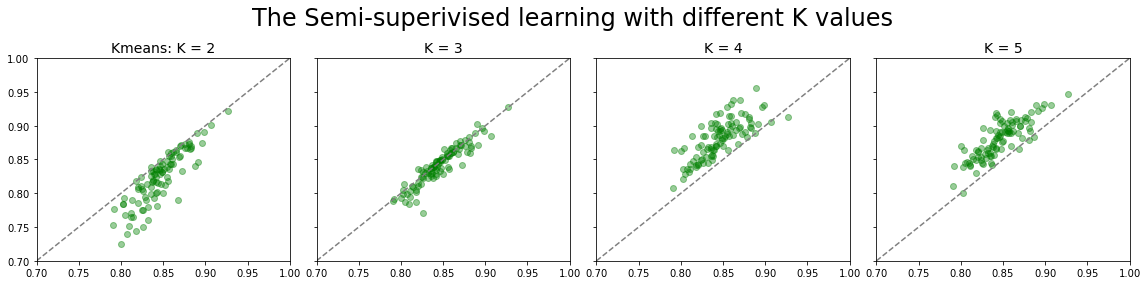

In [7]:
# plot the different K value for banknotes data Kmeans

xlabs = ['Kmeans: K = 2','K = 3','K = 4','K = 5']
fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(16, 4), constrained_layout=True, sharey=True)
fig.suptitle('The Semi-superivised learning with different K values',fontsize=24)
j = 0
for j in range(4):
    axs[j].set_title(xlabs[j], fontsize=14)
    axs[j].plot( [0.7, 1], [0.7, 1], ls="--", c=".5")
    axs[j].set(xlim=(0.7, 1), ylim=(0.7, 1))
    x, y = semi_sup_learn(dataset1, j+2)
    axs[j].scatter(x, y, c='green', alpha=0.4)
    j += 1
fig.subplots_adjust(hspace=0.2)
fig.tight_layout()
fig.subplots_adjust(top=0.8)
plt.show()




## Part three: dimensionality reduction, for semi-supervised learning (AIML421)

Text(0.5, 1.0, 'Ionosphere data PCA semi-supervised learning')

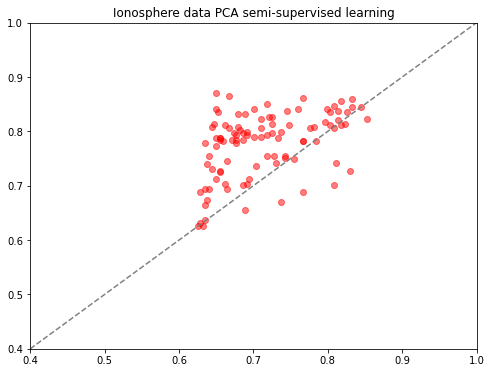

In [8]:
# Ionosphere data 34 features reduce to 5 features with Principal component analysis (PCA).
from sklearn.decomposition import PCA

# load the Ionosphere data and standardscaler it 
dataset = pd.read_csv('dataset_59_ionosphere.csv') # ionosphere data
data_X = dataset.iloc[:, 0:(len(dataset.columns)-1)]
dataX = pd.DataFrame(StandardScaler().fit_transform(data_X))
datay = dataset.iloc[:, -1]

# PCA the 34 features to 5 
pca_5 = PCA(n_components=5,  random_state=18)
pca_5.fit(dataX)
dataXD = pca_5.transform(dataX)

acc1,acc2=[],[]
for i in range(100):
    trainX1, testX1, trainy1, testy1 = train_test_split(dataX, datay,test_size=0.95, random_state=i)
    gnb3 = KNeighborsClassifier(n_neighbors = 3).fit(trainX1, trainy1)
    gnb_acc3 = gnb3.score(testX1, testy1, sample_weight=None)
    acc1.append(gnb_acc3)
    
    trainX2, testX2, trainy2, testy2 = train_test_split(dataXD, datay,test_size=0.95, random_state=i)
    gnb4 = KNeighborsClassifier(n_neighbors = 3).fit(trainX2, trainy2)
    gnb_acc4 = gnb4.score(testX2, testy2, sample_weight=None)
    acc2.append(gnb_acc4)

f, ax = plt.subplots(figsize=(8, 6))
ax.plot([0.4, 1], [0.4, 1], ls="--", c=".5")
ax.set(xlim=(0.4, 1), ylim=(0.4, 1))
ax.scatter(acc1, acc2, c='Red', alpha=0.5)
ax.set_title('Ionosphere data PCA semi-supervised learning')


### AIML420 report
The data ionosphere has 35 features, and the accuracy of classification is not very higher. So it is suitable which the data set for implement dimensionality reduction semi supervisor classification. All the features apply with standardization first. subsequently, using PCA Principal component analysis to reduce 35 features to 5. Finally, same process to part two, 95% test split the data. The data with PCA and without PCA by doing KNN classification. We can see the scatterplot showing the accuracy have improved. 